# Titanic - Machine Learning from Disaster
# Logistic Regression Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # high level interface for drawing attractive and informative statistical graphics
from sklearn.model_selection import train_test_split # the train test_split_function is used to split datasets into training and testing sets for machine learning model training and evaluation.
from sklearn.linear_model import LogisticRegression # logisticRegression is a supervised ML algo use for binary classification tasks.
from sklearn.metrics import accuracy_score # to evaluate the accuracy of classification models by comparing predicted labels with true labels.



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicProject-LogisticRegression/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# --- Data Cleaning ---

In [ ]:
train_df.isna().sum() #Missing Data

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Drop 'Cabin' due to too many missing values
df= train_df.drop(columns='Cabin',axis=1)


In [ ]:
# Fill missing 'Age' with mean
df.fillna({'Age': df['Age'].mean()}, inplace=True)
# Fill missing 'Embarked' with mode
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

# --- Feature Engineering ---

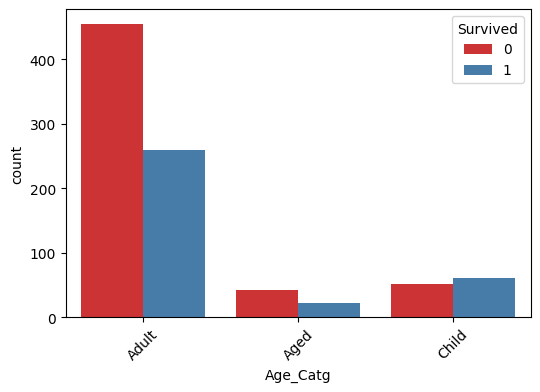

In [ ]:
# Create age category feature
def catg_Age(age):
  if age < 18:
    return 'Child'
  if age > 50:
    return 'Aged'
  else:
    return 'Adult'
df['Age_Catg'] = df['Age'].apply(catg_Age)

# Visualize survival by age category
plt.figure(figsize=(6,4))
sns.countplot(x='Age_Catg', hue='Survived',data=df, palette='Set1', dodge=True)
plt.xticks(rotation=45)
plt.show()

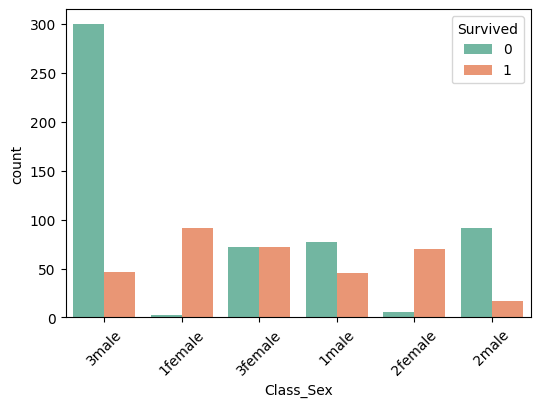

In [ ]:
# Combine Pclass and Sex
df['Pclass']= df['Pclass'].astype(str)
df['Class_Sex'] = df['Pclass'] + '' + df['Sex']

# Visualize survival by class and sex
plt.figure(figsize=(6,4))
sns.countplot(x='Class_Sex', hue='Survived',data=df,palette='Set2',dodge=True)
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Encode categorical variables
df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:

<ipython-input-75-a7048cf6117a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables:


# --- Feature Selection ---

In [ ]:
X= df.drop(columns=['PassengerId','Survived','Name','Ticket','Age_Catg','Class_Sex']) #These remaining columns are the features that I will use for training a machine learning model.
Y= df['Survived'] #Target Label


# --- Train-Test Split ---

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
# 20% of the data will be used for testing, and the remaining 80% will be used for training.
print(X.shape,X_train.shape, X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


# --- Model Training ---

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# --- Model Evaluation ---

In [ ]:
X_train_pred = model.predict(X_train)
training_accuracy= accuracy_score(Y_train, X_train_pred)
training_accuracy

0.8117977528089888

In [ ]:
Y_test_pred = model.predict(X_test)
test_accuracy= accuracy_score(Y_test, Y_test_pred)
test_accuracy

0.7821229050279329

# --- Predict on Test Data ---

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TitanicProject-LogisticRegression/test.csv')

In [ ]:
# Clean test data
test_df.drop(columns='Cabin', inplace=True)
test_df.fillna({'Age': test_df['Age'].mean()}, inplace=True)
test_df.fillna({'Fare': test_df['Fare'].mean()}, inplace=True)
test_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables

<ipython-input-57-2ac573416d50>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.replace({'Sex':{'male':1,'female':0}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True) #Encoding Categorical Variables


In [ ]:
# Feature selection for test data
X_final_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
predictions = model.predict(X_final_test)


<ipython-input-61-06e4d1b8555a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=submission_df, palette='tab10')


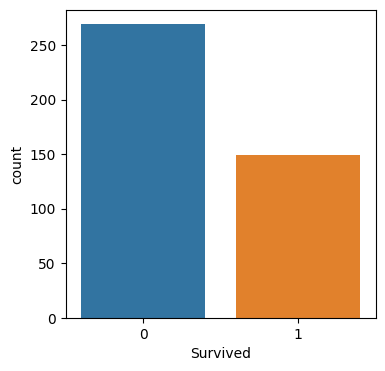

In [ ]:
# Create submission DataFrame
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'],'Survived': predictions})

# Visualize prediction result
plt.figure(figsize=(4,4))
sns.countplot(x='Survived', data=submission_df, palette='tab10')
plt.show()


In [ ]:
# Export to CSV
submission_df.to_csv('submission.csv', index=False)